
# Convolutional Neural Network


Welcome to your fourth (last) assignment. You will train a convolutional neural network to classify images in this assignment. 

## Exercises:
1. $\color{violet}{\textbf{(10\%) Data Loading}}$
2. $\color{violet}{\textbf{(30\%) ConvNet Creation}}$
4. $\color{violet}{\textbf{(50\%) Training}}$
5. $\color{violet}{\textbf{(10\%) Evaluation}}$

## Instructions:
- Write your code only between the $\color{green}{\textbf{\small \#\#\# START CODE HERE \#\#\#}}$ and $\color{green}{\textbf{\small \#\#\# END CODE HERE \#\#\#}}$ commented lines. $\color{red}{\textbf{Do not modify code out of the designated area.}}$
- This assignment was originated from one of the [PyTorch Tutorials](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html). 

**You will learn:**

how to use PyTorch on
1. Loading built-in datasets and creating dataloaders 
2. Defining a Convolutional Neural Network
3. Defining a loss functions and an optimizer
4. Training a model.


## 1. Load Data
For this assignment, we will use the CIFAR10 dataset.
It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of
size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.


### $\color{violet}{\textbf{(10\%) Exercise 1: Data Loading}}$
1. Use `torchvision.datasets` to load CIFAR10 dataset into `train_set` and `test_set`.
2. Use `torch.utils.data.DataLoader` to create dataloaders for training data: `dataloader_train` and test data: `dataloader_test`.
3. Remeber to apply transforms on `train_set` and `test_set`

Files already downloaded and verified
Files already downloaded and verified
Training set has 50000 instances
Validation set has 10000 instances
dataset categories: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


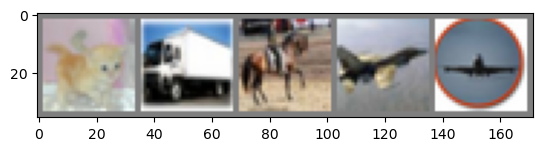

cat   truck horse airplane airplane


In [22]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  # transform PILImage images of range [0, 255] to Tensors of normalized range [0, 1].
batch_size = 64

### START CODE HERE ### (≈ 4 lines of code)
train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
dataloader_train = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
dataloader_test = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=2)
### END CODE HERE ### 

# Sanity check
print('Training set has {} instances'.format(len(train_set)))
print('Validation set has {} instances'.format(len(test_set)))
classes = train_set.classes
print(f"dataset categories: {classes}")
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
data_iterator = iter(dataloader_train)  
images, labels = next(data_iterator)  # get a batch of random training data
imshow(torchvision.utils.make_grid(images[:5]))  # display 5 samples
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(5)))  # print classes of corresponding images


<div class="alert alert-info"><h4>Note</h4><p>If running on Windows and you get a BrokenPipeError, try setting
    the num_worker of torch.utils.data.DataLoader() to 0.</p></div>



## 2. Create a Convolutional Neural Network

### $\color{violet}{\textbf{(30\%) Exercise 2: ConvNet Creation}}$
1. Use three convolutional kernels to compress the original image.
2. The 1st convolutional kernel has size of (5, 5), and stride of (2, 2). It will output 32 channels of features tensors with shape (32, 14, 14).
3. The 2nd convolutional kernel has size of (5, 5), and stride of (2, 2). It will output 64 channels of features tensors with shape (64, 5, 5).
4. The 3rd convolutional kernel has size of (3, 3), and stride of (1, 1). It will output 64 channels of features tensors with shape (64, 3, 3).


In [12]:
import torch.nn as nn
import torch.nn.functional as F


class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        ### START CODE HERE ### (≈ 2 lines of code)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5, stride=2)  # (in - k + 2*p) / s + 1
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=2)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        self.fc1 = nn.Linear(64 * 3 * 3, 128)  # 128 channels * 5 horizontal features * 5 vertical features
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        ### END CODE HERE ### 

    def forward(self, x):
        x = F.relu(self.conv1(x))  # (32 - 5) / 2 + 1 = 14.5
        x = F.relu(self.conv2(x))  # (14 - 5) / 2 + 1 = 5.5
        x = F.relu(self.conv3(x))  # (5 - 3) + 1 = 3
        x = x.view(-1, 64 * 3 * 3) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")
model = ConvNet().to(device)  # use GPU if available
print(model)

Using cuda device
ConvNet(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(2, 2))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(2, 2))
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


## 3. Train the Model

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.

### $\color{violet}{\textbf{(50\%) Exercise 3: Training}}$
1. Define a loss function for classification.
2. Define an appropriate optimizer.
3. Set a good learning rate for the optimizer.
4. Set a good training epochs number.
5. Make predictions.
6. Compute loss.
7. Compute gradient with back-propagation
8. Update model parameters.


----
Epoch: 1
[batch: 0] training batch loss: 2.301819324493408
[batch: 400] training batch loss: 2.2964839935302734
[batch: 800] training batch loss: 2.304054021835327
[batch: 1200] training batch loss: 2.2996339797973633
Averaged training loss: 2.302883551553692
Averaged test loss: 2.3015163066280877

----
Epoch: 2
[batch: 0] training batch loss: 2.3032424449920654
[batch: 400] training batch loss: 2.2993271350860596
[batch: 800] training batch loss: 2.298804521560669
[batch: 1200] training batch loss: 2.2973341941833496
Averaged training loss: 2.299844568647692
Averaged test loss: 2.296673659306423

----
Epoch: 3
[batch: 0] training batch loss: 2.2933003902435303
[batch: 400] training batch loss: 2.2939648628234863
[batch: 800] training batch loss: 2.2868235111236572
[batch: 1200] training batch loss: 2.2617363929748535
Averaged training loss: 2.2778387652028855
Averaged test loss: 2.205036697873644

----
Epoch: 4
[batch: 0] training batch loss: 2.221350908279419
[batch: 400] traini

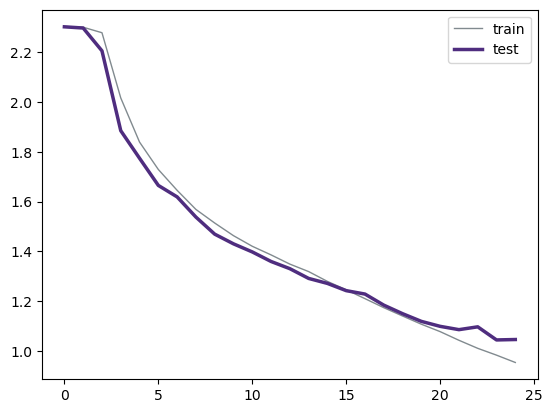

In [42]:
import torch.optim as optim
model = ConvNet().to(device)  # Re-initialize model parameters
losses_train = []
losses_test = []

### START CODE HERE ### (≈ 4 lines of code)
# Hyper-parameter setting
loss_fn = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
num_epochs = 25
### END CODE HERE ###
# Training loops
for epoch in range(num_epochs):  # loop over the dataset multiple times
    print(f"----\nEpoch: {epoch + 1}")
    model.train(True)
    acc_loss_train = 0.0  # accumulated loss in an epoch
    avg_loss_train = 0.0  # averaged loss in an epoch
    for i, batch_train in enumerate(dataloader_train):
        optimizer.zero_grad()
        features_train, labels_train = batch_train[0].to(device), batch_train[1].to(device)  # get a batch of data; data is a list of [images, labels]
        ### START CODE HERE ### (≈ 4 lines of code)
        preds_train = model(features_train)
        loss_train = loss_fn(preds_train, labels_train)
        loss_train.backward()  # back-propagation
        optimizer.step()  # update params
        ### END CODE HERE ###
        # Statistics
        acc_loss_train += loss_train.item()
        if not i % 200:    # print loss every 200 batches
            print(f"[batch: {i + i}] training batch loss: {loss_train.item()}")
            # loss_train = 0.0
    avg_loss_train = acc_loss_train / (i + 1)
    losses_train.append(avg_loss_train)
    print(f"Averaged training loss: {avg_loss_train}")
    # Test
    model.eval()
    acc_loss_test = 0.
    avg_loss_test = 0.
    with torch.no_grad():
        for i, batch_test in enumerate(dataloader_test):
            features_test, labels_test = batch_test[0].to(device), batch_test[1].to(device)
            preds_test = model(features_test)
            loss_test = loss_fn(preds_test, labels_test)
            acc_loss_test += loss_test.item()
    avg_loss_test = acc_loss_test / (i + 1)
    losses_test.append(avg_loss_test)
    print(f"Averaged test loss: {avg_loss_test}\n")


print('Finished Training')
plt.plot(losses_train, '#818A8F', linewidth=1)
plt.plot(losses_test, '#4F2D7F', linewidth=2.5)
plt.legend(['train', 'test'])

## 5. Evaluate the Convolutional Neural Network Model

We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.



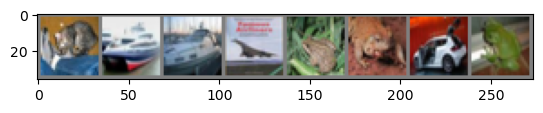

GroundTruth: 
 cat   ship  ship  airplane frog  frog  automobile frog 
Predicted: 
 cat   automobile ship  airplane frog  frog  automobile frog 


In [43]:
dataiter = iter(dataloader_test)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images[:8]))
outputs = model(images.to(device))
_, predicted = torch.max(outputs, 1)
print('GroundTruth: \n', ' '.join(f'{classes[labels[j]]:5s}' for j in range(8)))
print('Predicted: \n', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(8)))

The results seem pretty good.

Let us look at how the ConvNet model performs on the entire test dataset.

### $\color{violet}{\textbf{(10\%) Exercise 4: Model Accuracy}}$


In [44]:
num_correct = 0
num_total = 0
with torch.no_grad():  # zero the parameter gradients
    for data in dataloader_test:
        features, labels = data[0].to(device), data[1].to(device)
        ### START CODE HERE ### (≈ 2 lines of code)
        preds = model(features)  # predict images classes
        _, pred_class_ids = torch.max(preds, dim=1)  # the class with the highest energy is what we choose as prediction
        ### END CODE HERE ###
        num_total += labels.size(0)
        num_correct += (pred_class_ids == labels).sum().item()
print(f'Accuracy of the network on the 10000 test images: {100 * num_correct / num_total}%')

# Count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}
with torch.no_grad():  # again no gradients needed
    for data in dataloader_test:
        features, labels = data[0].to(device), data[1].to(device)
        preds = model(features)  # predict images classes
        _, pred_class_ids = torch.max(preds, dim=1)
        # collect the correct predictions for each class
        for lb, pci in zip(labels, pred_class_ids):
            if lb == pci:
                correct_pred[classes[lb]] += 1
            total_pred[classes[lb]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f}%')

Accuracy of the network on the 10000 test images: 63.34%
Accuracy for class: airplane is 64.5%
Accuracy for class: automobile is 79.0%
Accuracy for class: bird  is 47.0%
Accuracy for class: cat   is 39.1%
Accuracy for class: deer  is 53.6%
Accuracy for class: dog   is 51.5%
Accuracy for class: frog  is 79.8%
Accuracy for class: horse is 76.5%
Accuracy for class: ship  is 66.3%
Accuracy for class: truck is 76.1%


# Congrats on finishing this assignment!